In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
data1st = pd.read_csv('bank_train.csv')
data2st = pd.read_csv('bank_train (1).csv')

In [3]:
data1st.equals(data2st)

True

In [4]:
data = data2st.copy(deep=True)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4466 entries, 0 to 4465
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4466 non-null   int64  
 1   job        4466 non-null   object 
 2   marital    4466 non-null   object 
 3   education  4466 non-null   object 
 4   default    4466 non-null   object 
 5   balance    4465 non-null   float64
 6   housing    4466 non-null   object 
 7   loan       4466 non-null   object 
 8   contact    4466 non-null   object 
 9   day        4466 non-null   int64  
 10  month      4466 non-null   object 
 11  duration   4466 non-null   int64  
 12  campaign   4466 non-null   int64  
 13  pdays      4466 non-null   int64  
 14  previous   4466 non-null   int64  
 15  poutcome   4465 non-null   object 
 16  deposit    4466 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 593.3+ KB
None


In [6]:
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      1
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     1
deposit      0
dtype: int64


In [7]:
missing = data[data.isnull().any(axis=1)]
print(missing)

      age          job  marital  education default  balance housing loan  \
3105   36     services   single  secondary      no      NaN      no   no   
3537   44  blue-collar  married  secondary      no    294.0     yes   no   

      contact  day month  duration  campaign  pdays  previous poutcome deposit  
3105  unknown   17   jun       256         9     -1         0  unknown      no  
3537  unknown   19   may        66         2     -1         0      NaN      no  


In [8]:
data2 = data.dropna(axis=0)
print(data2.describe())

               age       balance          day     duration     campaign  \
count  4464.000000   4464.000000  4464.000000  4464.000000  4464.000000   
mean     41.100582   1484.601030    15.739471   371.183468     2.483423   
std      11.907909   3254.226206     8.449796   346.947767     2.632412   
min      18.000000  -3058.000000     1.000000     3.000000     1.000000   
25%      32.000000    107.000000     8.000000   137.000000     1.000000   
50%      38.000000    539.000000    16.000000   256.000000     2.000000   
75%      49.000000   1728.000000    22.000000   485.250000     3.000000   
max      93.000000  81204.000000    31.000000  3284.000000    43.000000   

             pdays     previous  
count  4464.000000  4464.000000  
mean     52.905018     0.867384  
std     111.165774     2.381660  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      66.250000     1.000000  
max     828.000000    41.000000  


In [9]:
eduVSdep = pd.crosstab(index = data2['education'],
                      columns = data2['deposit'],
                      margins = True,
                      normalize = 'index')

print(eduVSdep)

deposit          no       yes
education                    
primary    0.592965  0.407035
secondary  0.565177  0.434823
tertiary   0.449535  0.550465
unknown    0.494737  0.505263
All        0.526882  0.473118


In [10]:
depVSedu = pd.crosstab(index = data2['deposit'],
                      columns = data2['education'],
                      margins = True,
                      normalize = 'index')

print(depVSedu)

education   primary  secondary  tertiary   unknown
deposit                                           
no         0.150510   0.521684  0.287840  0.039966
yes        0.115057   0.446970  0.392519  0.045455
All        0.133737   0.486335  0.337366  0.042563


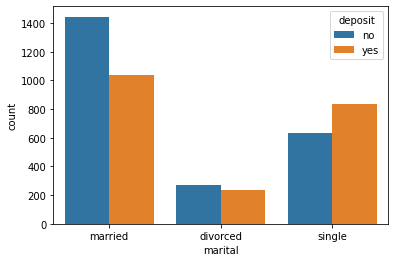

In [11]:
marr = sns.countplot(x='marital',hue='deposit',data=data2)

In [12]:
data2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [13]:
houVSdep = pd.crosstab(index = data2['housing'],
                      columns = data2['deposit'],
                      margins = True,
                      normalize = 'index')
houVSdep

deposit,no,yes
housing,,
no,0.436668,0.563332
yes,0.625293,0.374707
All,0.526882,0.473118


In [14]:
loanVSdep = pd.crosstab(index = data2['loan'],
                      columns = data2['deposit'],
                      margins = True,
                      normalize = 'index')
loanVSdep

deposit,no,yes
loan,,
no,0.507467,0.492533
yes,0.656897,0.343103
All,0.526882,0.473118


<AxesSubplot:xlabel='age', ylabel='balance'>

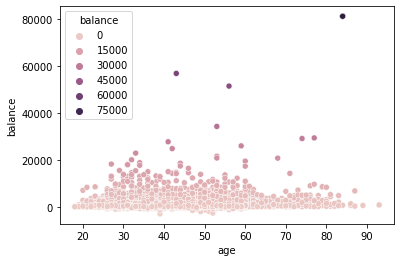

In [15]:
sns.scatterplot(x='age',y='balance',data=data2,hue='balance')

In [16]:
outcVscamp = pd.crosstab(index = data2['poutcome'],
                      columns = data2['campaign'],
                      margins = True,
                      normalize = 'index')

In [17]:
outcVscamp

campaign,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,31,32,33,43
poutcome,,,,,,,,,,,,,,,,,,,,,
failure,0.534653,0.273267,0.099010,0.037624,0.029703,0.009901,0.013861,0.001980,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
other,0.440000,0.257778,0.133333,0.062222,0.035556,0.035556,0.004444,0.008889,0.022222,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
success,0.570115,0.252874,0.108046,0.025287,0.025287,0.011494,0.002299,0.002299,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
unknown,0.391937,0.279479,0.126099,0.073659,0.037890,0.028190,0.013944,0.013034,0.006972,0.004547,...,0.000303,0.000303,0.000909,0.000303,0.000303,0.000303,0.000303,0.000606,0.000303,0.000303
All,0.427867,0.275090,0.121640,0.064292,0.035618,0.024866,0.012321,0.010529,0.006272,0.003360,...,0.000224,0.000224,0.000672,0.000224,0.000224,0.000224,0.000224,0.000448,0.000224,0.000224
